In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
%cd /content/gdrive/MyDrive/AT2
#!unzip /content/gdrive/MyDrive/AT2/dataset_42028assg2_14355123.zip -d /content/gdrive/MyDrive/AT2


/content/gdrive/MyDrive/AT2


In [ ]:
%cd /content/gdrive/MyDrive/AT2/Image_Classification/dataset_14355123

/content/gdrive/MyDrive/AT2/Image_Classification/dataset_14355123


In [ ]:
import os
import random
import shutil
from tqdm import tqdm_notebook as tqdm
# define the path of dataset.
data_folder = "/content/gdrive/MyDrive/AT2/Image_Classification/dataset_14355123"

# Define folder paths for training, validation, and testing sets.
train_folder = "/content/gdrive/MyDrive/AT2/Image_Classification/train"
valid_folder = "/content/gdrive/MyDrive/AT2/Image_Classification/valid"
test_folder = "/content/gdrive/MyDrive/AT2/Image_Classification/test"

def split_dataset(data_folder, train_folder, valid_folder, test_folder, train_ratio=0.8, valid_ratio=0.1):
    # Create train, validation, and test folders if they don't exist
    os.makedirs(train_folder, exist_ok=True)
    os.makedirs(valid_folder, exist_ok=True)
    os.makedirs(test_folder, exist_ok=True)

    # Loop through each folder in the data folder
    for folder in os.listdir(data_folder):
        folder_path = os.path.join(data_folder, folder)
        if os.path.isdir(folder_path):
            # Create train, validation, and test subfolders for the current class
            os.makedirs(os.path.join(train_folder, folder), exist_ok=True)
            os.makedirs(os.path.join(valid_folder, folder), exist_ok=True)
            os.makedirs(os.path.join(test_folder, folder), exist_ok=True)

            # Get all image paths in the current class folderile(os.path.join(folder_path, image))]
            image_files = [
              image for image in os.listdir(folder_path) 
              if os.path.isfile(os.path.join(folder_path, image))
            ]

            # Shuffle the image paths
            random.seed(14355123)
            random.shuffle(image_files)

            # Calculate the indices for train, validation, and test splits
            num_images = len(image_files)
            train_index = int(train_ratio * num_images)
            valid_index = int((valid_ratio + train_ratio) * num_images)
            # Copy the images to the train, validation, and test folders
            for i, image in enumerate(image_files):
                if i < train_index:
                    shutil.copy(os.path.join(folder_path, image), os.path.join(train_folder, folder))
                elif i < valid_index:
                    shutil.copy(os.path.join(folder_path, image), os.path.join(valid_folder, folder))
                else:
                    shutil.copy(os.path.join(folder_path, image), os.path.join(test_folder, folder))

split_dataset(data_folder, train_folder, valid_folder, test_folder)

In [ ]:
data_folder = "/content/gdrive/MyDrive/AT2/Image_Classification/dataset_14355123"
train_folder = "/content/gdrive/MyDrive/AT2/Image_Classification/train"
valid_folder = "/content/gdrive/MyDrive/AT2/Image_Classification/valid"
test_folder = "/content/gdrive/MyDrive/AT2/Image_Classification/test"

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
#Compress images
validation_datagen = ImageDataGenerator(rescale=1/255)
test_datagen = ImageDataGenerator(rescale=1/255) 
train_datagen = ImageDataGenerator(rescale=1./255)

# Split images into 32 batches for training
train_generator = train_datagen.flow_from_directory(
        '/content/gdrive/MyDrive/AT2/Image_Classification/train',  #Location for storing training dataset
        target_size=(224, 224),  #The size of the image is defined as  224*224
        batch_size=32, #Because we need to use binary cross entropy, we have to use Binary to classify
        class_mode='categorical')  #Categorical is a multi category

#Split images into 32 batches for training
test_generator = test_datagen.flow_from_directory(
        '/content/gdrive/MyDrive/AT2/Image_Classification/test',  #Location for storing validation sets
        target_size=(224, 224),  #The size of the image is defined as 224*224
        batch_size=32,
        shuffle = False,
        #Because we need to use binary cross entropy, we have to use Binary to classify
        class_mode='categorical') #Categorical is a multi category

#Split images into 32 batches for training
validation_generator = validation_datagen.flow_from_directory(
        '/content/gdrive/MyDrive/AT2/Image_Classification/valid',  #Location for storing validation sets
        target_size=(224, 224),  #The size of the image is defined as 224*224
        batch_size=32,
        #Because we need to use binary cross entropy, we have to use Binary to classify
        class_mode='categorical') #Categorical is a multi category

Found 2609 images belonging to 20 classes.
Found 336 images belonging to 20 classes.
Found 328 images belonging to 20 classes.


In [ ]:
train_generator.class_indices

{'BIRD OF PARADISE': 0,
 'BLACK HEADED CAIQUE': 1,
 'CINNAMON FLYCATCHER': 2,
 'Doberman': 3,
 'EASTERN ROSELLA': 4,
 'FLAME TANAGER': 5,
 'GOLDEN EAGLE': 6,
 'GRAY PARTRIDGE': 7,
 'PUNA TEAL': 8,
 'SCARLET FACED LIOCICHLA': 9,
 'Shetland_sheepdog': 10,
 'VARIED THRUSH': 11,
 'Weimaraner': 12,
 'chow': 13,
 'collie': 14,
 'curly-coated_retriever': 15,
 'groenendael': 16,
 'otterhound': 17,
 'pug': 18,
 'silky_terrier': 19}

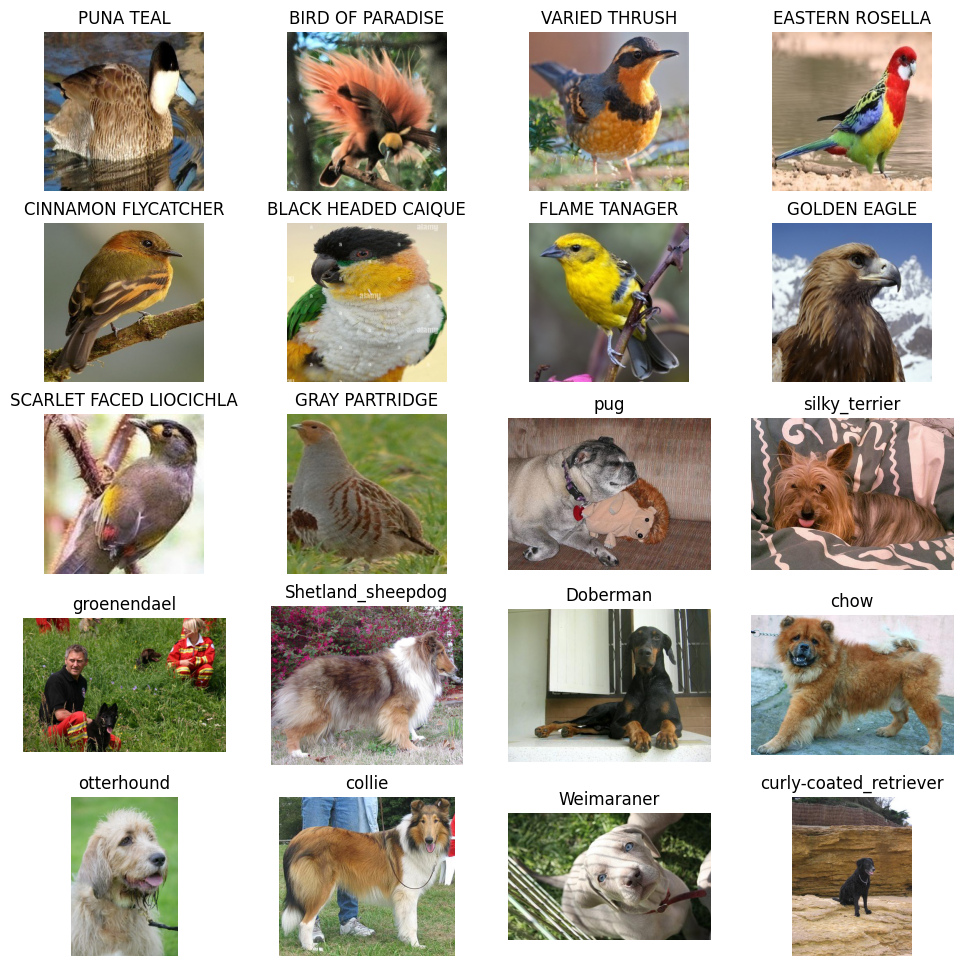

In [ ]:
from PIL import Image
import os
import matplotlib.pyplot as plt

data_dir = '/content/gdrive/MyDrive/AT2/Image_Classification/dataset_14355123'
file_lists = []
for file_name in os.listdir(data_dir):
    folder = os.path.join(data_dir, file_name)
    files = os.listdir(folder)
    file_lists.append([os.path.join(folder, file) for file in files])

plt.figure(figsize=(12, 12))
for i in range(20):
    plt.subplot(5, 4, i+1)
    image_path = file_lists[i][0]
    image = Image.open(image_path)
    plt.imshow(image)
    label = os.path.basename(os.path.dirname(image_path))
    plt.title(label)
    plt.axis('off')
plt.show()

In [ ]:
len(train_generator.class_indices) #查看类别的个数


20

In [ ]:
# from tensorflow.keras.applications import VGG16 
from keras.layers import Dropout
from tensorflow.keras import models
from tensorflow.keras import layers
from tensorflow.keras import optimizers
from tensorflow.keras.applications import VGG16 

baseline = VGG16(weights=None,include_top=False, input_shape=(224,224, 3) ) 
baseline_model =  models.Sequential()
baseline_model.add(baseline) #add baseline model
baseline_model.add(layers.Flatten())
baseline_model.add(layers.Dense(4096, activation='relu'))
baseline_model.add(layers.Dense(4096, activation='relu'))
baseline_model.add(layers.Dense(20, activation='softmax'))

In [ ]:
baseline_model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 7, 7, 512)         14714688  
                                                                 
 flatten_3 (Flatten)         (None, 25088)             0         
                                                                 
 dense_12 (Dense)            (None, 4096)              102764544 
                                                                 
 dense_13 (Dense)            (None, 4096)              16781312  
                                                                 
 dense_14 (Dense)            (None, 20)                81940     
                                                                 
Total params: 134,342,484
Trainable params: 134,342,484
Non-trainable params: 0
_________________________________________________________________


In [ ]:
from keras.utils.vis_utils import plot_model
plot_model(baseline_model, to_file='baseline_model.png', show_shapes=True, show_layer_names=True)

In [ ]:
import math
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.optimizers import RMSprop
baseline_model.compile(loss='categorical_crossentropy',
              optimizer=RMSprop(learning_rate=1e-4), #Adjustable learning rate
              metrics=['acc'])

In [ ]:
batch_size=32
history = baseline_model.fit_generator(
      train_generator,
      steps_per_epoch=math.ceil(train_generator.samples/batch_size),  # n images = batch_size * steps
      epochs=35,
      validation_data=validation_generator,
      validation_steps=math.ceil(validation_generator.samples/batch_size),  # n images = batch_size * steps
      verbose=1)

<ipython-input-41-6e9151e413cd>:2: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = baseline_model.fit_generator(


Epoch 1/35
82/82 [==============================] - 15s 141ms/step - loss: 2.9955 - acc: 0.0533 - val_loss: 2.9916 - val_acc: 0.0610
Epoch 2/35
82/82 [==============================] - 11s 136ms/step - loss: 2.9924 - acc: 0.0575 - val_loss: 2.9861 - val_acc: 0.0701
Epoch 3/35
82/82 [==============================] - 11s 137ms/step - loss: 2.9673 - acc: 0.0705 - val_loss: 2.9302 - val_acc: 0.0610
Epoch 4/35
82/82 [==============================] - 11s 136ms/step - loss: 2.8788 - acc: 0.1135 - val_loss: 2.6318 - val_acc: 0.1829
Epoch 5/35
82/82 [==============================] - 11s 135ms/step - loss: 2.6176 - acc: 0.1767 - val_loss: 2.5038 - val_acc: 0.2165
Epoch 6/35
82/82 [==============================] - 11s 135ms/step - loss: 2.4091 - acc: 0.2488 - val_loss: 2.3689 - val_acc: 0.2439
Epoch 7/35
82/82 [==============================] - 11s 136ms/step - loss: 2.1720 - acc: 0.3277 - val_loss: 2.1736 - val_acc: 0.3110
Epoch 8/35
82/82 [==============================] - 11s 136ms/step - 

In [ ]:
baseline_model.save('/content/gdrive/MyDrive/AT2/Image_Classification/vgg16.h5')

In [ ]:
import matplotlib.pyplot as plt
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and validation loss')
plt.legend()

plt.show() 

In [ ]:
print('Evaluation Train dataset',baseline_model.evaluate(train_generator))
print('Evaluation Validation dataset',baseline_model.evaluate(validation_generator))
print('Evaluation Test dataset',baseline_model.evaluate(test_generator))


82/82 [==============================] - 10s 122ms/step - loss: 1.0394e-04 - acc: 1.0000
Evaluation Train dataset [0.00010393805132480338, 1.0]
11/11 [==============================] - 1s 116ms/step - loss: 5.3989 - acc: 0.4146
Evaluation Validation dataset [5.398860454559326, 0.4146341383457184]
11/11 [==============================] - 1s 129ms/step - loss: 6.3368 - acc: 0.4048
Evaluation Test dataset [6.336788177490234, 0.4047619104385376]


In [ ]:
import numpy as np
print("softmax:",baseline_model.predict(test_generator)[0])
print("ArgMax softmax: ",np.argmax(baseline_model.predict(test_generator)[0]))
print("Result: ",test_generator.classes[0])

11/11 [==============================] - 1s 118ms/step
softmax: [9.9021250e-01 6.2487984e-06 3.2329684e-05 1.7304700e-07 6.9656852e-07
 8.0233164e-08 3.5308642e-06 1.2572009e-08 1.4609778e-04 9.4294008e-03
 6.4819214e-06 2.6148625e-06 8.3177774e-08 1.5083076e-04 2.8652974e-07
 4.7600684e-06 1.4080942e-09 3.7980990e-06 1.9625406e-09 8.7522416e-08]
11/11 [==============================] - 1s 121ms/step
ArgMax softmax:  0
Result:  0


11/11 [==============================] - 1s 124ms/step
Predict: 0.40476190476190477


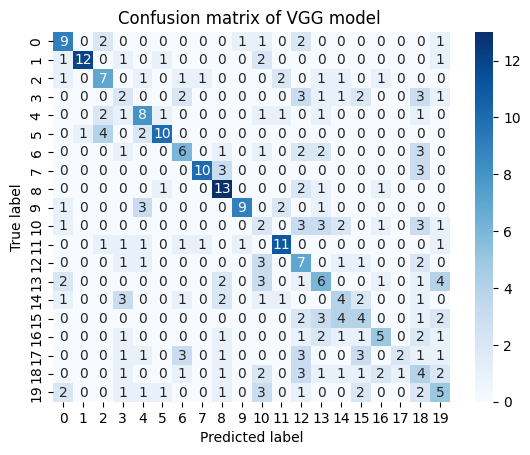

In [ ]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
import seaborn as sns
import numpy as np
y_pred = baseline_model.predict(test_generator)
y_pred = np.argmax(y_pred, axis=1) # Obtain Forecast Category
y_test = test_generator.classes

accuracy = accuracy_score(y_test, y_pred)
print("Predict:", accuracy)

confusion_mat = confusion_matrix(y_test, y_pred)
sns.heatmap(confusion_mat, annot=True, cmap='Blues')
plt.title('Confusion matrix of VGG model ')
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.show()



Predict: 0.40476190476190477
True label: 0 - BIRD OF PARADISE, Predicted label: 19 - silky_terrier


True label: 0 - BIRD OF PARADISE, Predicted label: 12 - Weimaraner


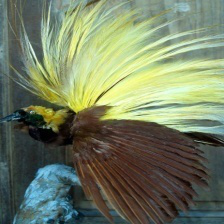

True label: 0 - BIRD OF PARADISE, Predicted label: 12 - Weimaraner


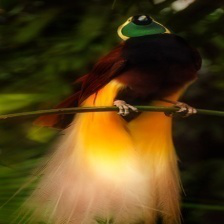

True label: 0 - BIRD OF PARADISE, Predicted label: 2 - CINNAMON FLYCATCHER


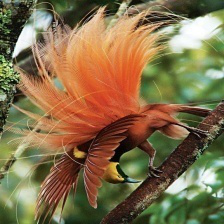

True label: 0 - BIRD OF PARADISE, Predicted label: 10 - Shetland_sheepdog


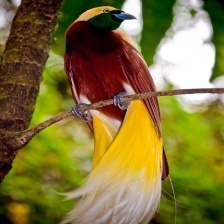

True label: 0 - BIRD OF PARADISE, Predicted label: 9 - SCARLET FACED LIOCICHLA


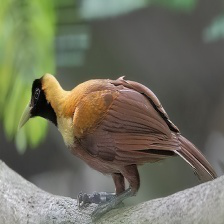

True label: 0 - BIRD OF PARADISE, Predicted label: 2 - CINNAMON FLYCATCHER


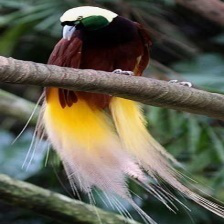

True label: 1 - BLACK HEADED CAIQUE, Predicted label: 0 - BIRD OF PARADISE


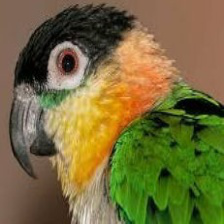

True label: 1 - BLACK HEADED CAIQUE, Predicted label: 19 - silky_terrier


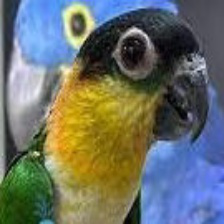

True label: 1 - BLACK HEADED CAIQUE, Predicted label: 5 - FLAME TANAGER


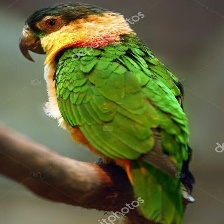

In [ ]:
from PIL import Image
wrong_predictions=[]
predictions = y_pred
accuracy = accuracy_score(y_test, y_pred)
print("Predict:", accuracy)
for i in range(len(predictions)):
   if not np.array_equal(predictions[i], y_test[i]):
      wrong_predictions.append(i)

class_names = list(test_generator.class_indices.keys())

for index in wrong_predictions[:10]:
    img_path = test_generator.filepaths[index]
    img = Image.open(img_path)
    true_label = test_generator.classes[index]
    true_label_name = class_names[true_label]
    pred_label = y_pred[index]
    pred_label_name = class_names[pred_label]
    print(f"True label: {true_label} - {true_label_name}, Predicted label: {pred_label} - {pred_label_name}")
    img.show()




Custom model

In [ ]:
from tensorflow.keras.applications import VGG16
from tensorflow.keras.layers import Dropout, BatchNormalization
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers
from tensorflow.keras import regularizers
custom_vgg_model = VGG16(weights=None, include_top=False, input_shape=(224,224, 3))
custom_model = Sequential()
custom_model.add(custom_vgg_model)
custom_model.add(layers.Flatten())
custom_model.add(layers.Dense(4096, activation='relu'))
custom_model.add(BatchNormalization())
custom_model.add(layers.Dense(4096, activation='relu', kernel_regularizer=regularizers.l2(0.01)))
custom_model.add(Dropout(0.5))
custom_model.add(layers.Dense(20, activation='softmax'))


In [ ]:
custom_model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 7, 7, 512)         14714688  
                                                                 
 flatten_4 (Flatten)         (None, 25088)             0         
                                                                 
 dense_15 (Dense)            (None, 4096)              102764544 
                                                                 
 batch_normalization_2 (Batc  (None, 4096)             16384     
 hNormalization)                                                 
                                                                 
 dense_16 (Dense)            (None, 4096)              16781312  
                                                                 
 dropout_5 (Dropout)         (None, 4096)              0         
                                                      

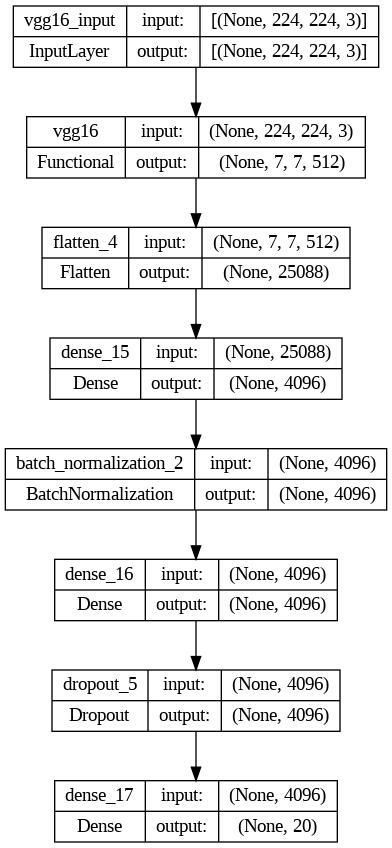

In [ ]:
from keras.utils.vis_utils import plot_model
plot_model(custom_model, to_file='custom_model.png', show_shapes=True, show_layer_names=True)

In [ ]:
ls

'BIRD OF PARADISE'/        Doberman/           pug/
'BLACK HEADED CAIQUE'/    'EASTERN ROSELLA'/  'PUNA TEAL'/
 chow/                    'FLAME TANAGER'/    'SCARLET FACED LIOCICHLA'/
'CINNAMON FLYCATCHER'/    'GOLDEN EAGLE'/      Shetland_sheepdog/
 collie/                  'GRAY PARTRIDGE'/    silky_terrier/
 curly-coated_retriever/   groenendael/       'VARIED THRUSH'/
 custom_model.png          otterhound/         Weimaraner/


In [ ]:
import math
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.optimizers import RMSprop
custom_model.compile(loss='categorical_crossentropy',
              optimizer=RMSprop(learning_rate=1e-4), 
              metrics=['acc'])
batch_size=32
history = custom_model.fit_generator(
      train_generator,
      steps_per_epoch=math.ceil(train_generator.samples/batch_size),  # n images = batch_size * steps
      epochs=35,
      validation_data=validation_generator,
      validation_steps=math.ceil(validation_generator.samples/batch_size),  # n images = batch_size * steps
      verbose=1)

Epoch 1/35


<ipython-input-52-e31c38d34c76>:8: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = custom_model.fit_generator(


82/82 [==============================] - 16s 141ms/step - loss: 33.2667 - acc: 0.1031 - val_loss: 24.9068 - val_acc: 0.0610
Epoch 2/35
82/82 [==============================] - 11s 135ms/step - loss: 19.0412 - acc: 0.1725 - val_loss: 14.5645 - val_acc: 0.1159
Epoch 3/35
82/82 [==============================] - 11s 136ms/step - loss: 11.1556 - acc: 0.2304 - val_loss: 9.3705 - val_acc: 0.0518
Epoch 4/35
82/82 [==============================] - 11s 134ms/step - loss: 7.1648 - acc: 0.3116 - val_loss: 6.5017 - val_acc: 0.1067
Epoch 5/35
82/82 [==============================] - 11s 135ms/step - loss: 5.0732 - acc: 0.3944 - val_loss: 4.8229 - val_acc: 0.3232
Epoch 6/35
82/82 [==============================] - 11s 135ms/step - loss: 3.9515 - acc: 0.4642 - val_loss: 4.8030 - val_acc: 0.2652
Epoch 7/35
82/82 [==============================] - 11s 135ms/step - loss: 3.2489 - acc: 0.5251 - val_loss: 4.5102 - val_acc: 0.2988
Epoch 8/35
82/82 [==============================] - 11s 136ms/step - loss: 

In [ ]:
custom_model.save('/content/gdrive/MyDrive/AT2/Image_Classification/custom_vgg16.h5')

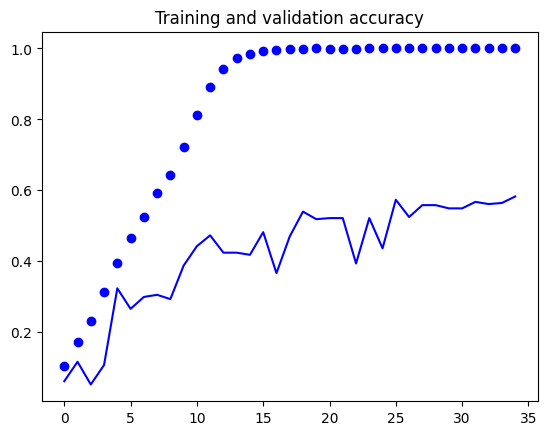

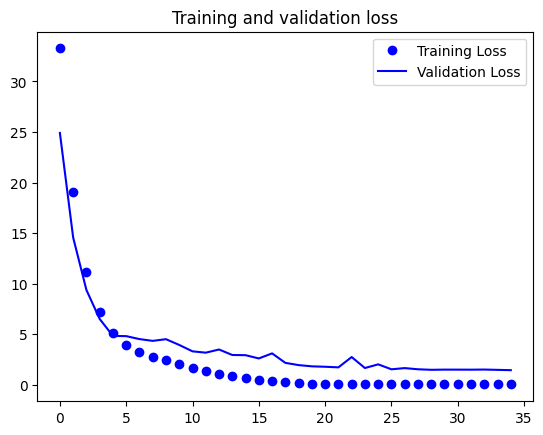

In [ ]:
import matplotlib.pyplot as plt
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [ ]:
print('Evaluation Train dataset',custom_model.evaluate(train_generator))
print('Evaluation Validation dataset',custom_model.evaluate(validation_generator))
print('Evaluation Test dataset',custom_model.evaluate(test_generator))

82/82 [==============================] - 10s 121ms/step - loss: 0.0165 - acc: 1.0000
Evaluation Train dataset [0.016507355496287346, 1.0]
11/11 [==============================] - 1s 117ms/step - loss: 1.4354 - acc: 0.5823
Evaluation Validation dataset [1.4353750944137573, 0.582317054271698]
11/11 [==============================] - 1s 122ms/step - loss: 1.4655 - acc: 0.5595
Evaluation Test dataset [1.46550714969635, 0.5595238208770752]


In [ ]:
import numpy as np
print("softmax:",custom_model.predict(test_generator)[0])
print("ArgMax softmax: ",np.argmax(custom_model.predict(test_generator)[0]))
print("Result: ",test_generator.classes[0])



11/11 [==============================] - 2s 123ms/step
softmax: [9.9885511e-01 2.7167041e-05 2.5560567e-04 3.8568171e-05 3.3881421e-05
 1.1104059e-04 7.4743890e-05 3.1196466e-06 1.8542130e-05 1.9517541e-04
 3.5766327e-05 1.7695971e-04 1.8097875e-05 2.3164406e-05 1.6257725e-05
 3.0706386e-05 3.1746618e-05 2.1726917e-05 8.5744114e-06 2.4095074e-05]
11/11 [==============================] - 1s 135ms/step
ArgMax softmax:  0
Result:  0


In [ ]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
import seaborn as sns
import numpy as np
y1_pred = custom_model.predict(test_generator)
y1_pred = np.argmax(y1_pred, axis=1) # Obtain Forecast Category
print(y1_pred)

11/11 [==============================] - 1s 119ms/step
[ 0  0 11  0  0  8  0  0  0  0  0  0  0  0  7  0  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  2  2  2  6  5  2  2  2  2  2  7 17  2  9
  5  9  4  3  3  3  3  6 19 12  3  3 18 16 15  3 14  4  4  4  4  4  5  4
  4  4  4  0  4  4 14  4  5  2  5  5  4  2  5  4  5  5  5  0  9  5  5  2
  5  5  7 12  6  6  6  6  5  7 16  6  8  6  8 17  6  6  7  1  7  7  7  7
  7  7  7  7  7  7  7  7  7  7  8  8  8  8  6  8 11  8  8  8  8  8 11  8
  8  8  8  8  9  9  9  9  9  9  9  9  9  9  9  9  2  9  5  9 14 12 10 14
 13 12 10 10 13 10 14 13 18  3 10  3 11 11 12 11  8 11 11 11 11 11 11 11
 11 11 11 11  8 11 11 12 12 12  3  4 15  3 12  6 18  6  3  6 13 12 13 16
 13 17 14 13 13 13 13 13 13 17 13  1 18 14 13 13 12 13 10  2 17 14 19 13
 14 10 18 10 16 14 13 17 17 18 16  7 18 13  6 15  3 15 15 14 18 14 19 15
  3 16 16 16 15 16 16 16 18 16 16 16  3  8 16 15 16 14 12  9 12  7 18 13
 13 11 10 17 11 17 17 13 14 16 15 12 18  7 18 18 15 14 16 17 13 17 15

11/11 [==============================] - 1s 114ms/step
Accuracy on test dataset: 0.5595238095238095


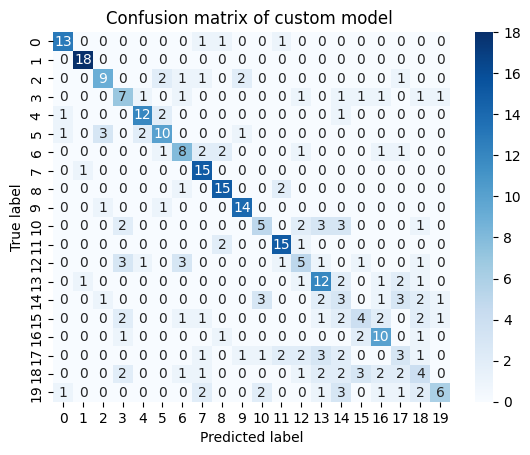

In [ ]:

from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
import seaborn as sns
import numpy as np
y1_pred = custom_model.predict(test_generator)
y1_pred = np.argmax(y1_pred, axis=1) # Obtain Forecast Category
y1_test = np.array(test_generator.classes)

accuracy = accuracy_score(y1_test, y1_pred)
print("Accuracy on test dataset:", accuracy)

confusion_mat = confusion_matrix(y1_test, y1_pred)
sns.heatmap(confusion_mat, annot=True, cmap='Blues')
plt.title('Confusion matrix of custom model ')
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.show()


Predict: 0.5595238095238095
True label: 0 - BIRD OF PARADISE, Predicted label: 11 - VARIED THRUSH


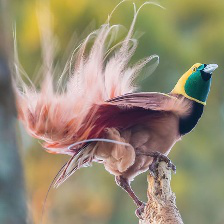

True label: 0 - BIRD OF PARADISE, Predicted label: 8 - PUNA TEAL


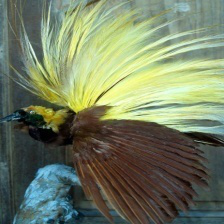

True label: 0 - BIRD OF PARADISE, Predicted label: 7 - GRAY PARTRIDGE


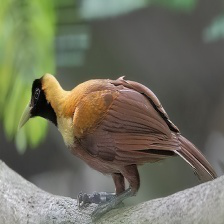

True label: 2 - CINNAMON FLYCATCHER, Predicted label: 6 - GOLDEN EAGLE


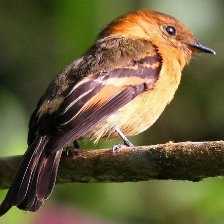

True label: 2 - CINNAMON FLYCATCHER, Predicted label: 5 - FLAME TANAGER


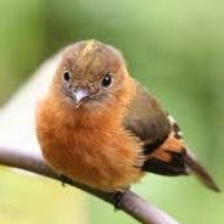

True label: 2 - CINNAMON FLYCATCHER, Predicted label: 7 - GRAY PARTRIDGE


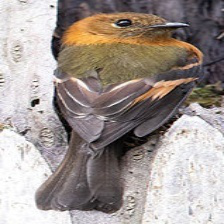

True label: 2 - CINNAMON FLYCATCHER, Predicted label: 17 - otterhound


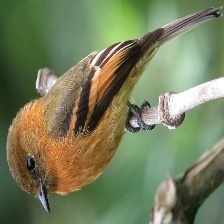

True label: 2 - CINNAMON FLYCATCHER, Predicted label: 9 - SCARLET FACED LIOCICHLA


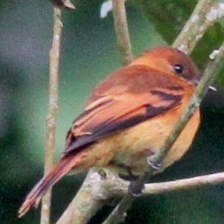

True label: 2 - CINNAMON FLYCATCHER, Predicted label: 5 - FLAME TANAGER


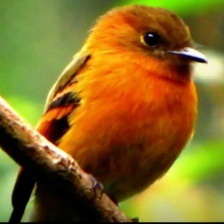

True label: 2 - CINNAMON FLYCATCHER, Predicted label: 9 - SCARLET FACED LIOCICHLA


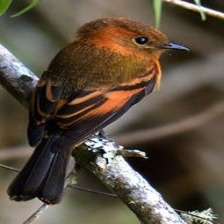

In [ ]:
from PIL import Image
wrong_predictions1=[]
predictions1 = y1_pred
accuracy = accuracy_score(y1_test, y1_pred)
print("Predict:", accuracy)
for i in range(len(predictions1)):
   if not np.array_equal(predictions1[i], y1_test[i]):
      wrong_predictions1.append(i)

class_names = list(test_generator.class_indices.keys())

for index in wrong_predictions1[:10]:
    img_path = test_generator.filepaths[index]
    img = Image.open(img_path)
    true_label = test_generator.classes[index]
    true_label_name = class_names[true_label]
    pred_label = y1_pred[index]
    pred_label_name = class_names[pred_label]
    print(f"True label: {true_label} - {true_label_name}, Predicted label: {pred_label} - {pred_label_name}")
    img.show()